## Problem Statement:-

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

In [129]:
### Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [130]:
### Creating a dataframe object named df 
df=pd.read_csv('medical-charges.csv')
###Displaying top 5 rows of the dataframe
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [131]:
### Lets see the shape of df
df.shape

(1338, 7)

In [132]:
#### Lets see all the info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [133]:
### Lets see if any null values are present in df
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [134]:
### Lets see some statistics of numerical columns of df
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [135]:
### Lets see the list of categorical columns in df
categorical_columns=[feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_columns

['sex', 'smoker', 'region']

In [136]:
### Lets see the list of numerical columns in df
numerical_columns=[feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_columns

['age', 'bmi', 'children', 'charges']

### Exploratory Data Analysis

In [137]:
### The following settings will improve the default style and font sizes for our charts.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

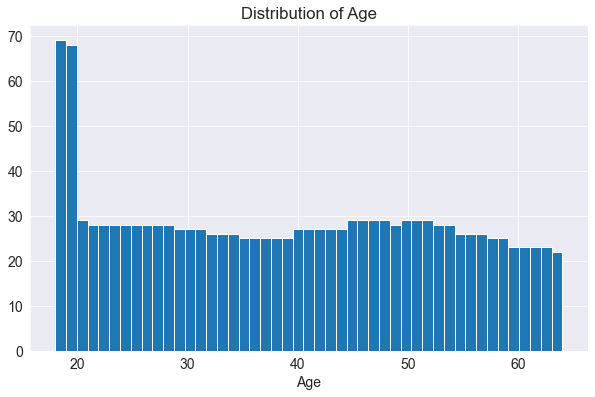

In [138]:
### Lets do some EDA 
plt.hist(df['age'],bins=47)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

##### Age columns follows mostly a uniform distribution except under age 20 group

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



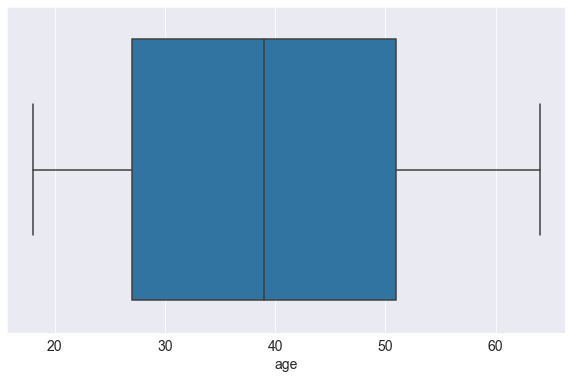

In [139]:
### boxplot of age column
sns.boxplot(df['age'])
plt.show()

In [140]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

##### Distribution of bmi column follows a gaussian distribution centered around 30 . BMI from 25 to 39 is considered as overweight and obese

Formula of BMI=Weight in kg/height in metre square

145=weight/(1.7 * 1.7)

weight=130

#### Outlier handling in BMI column

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



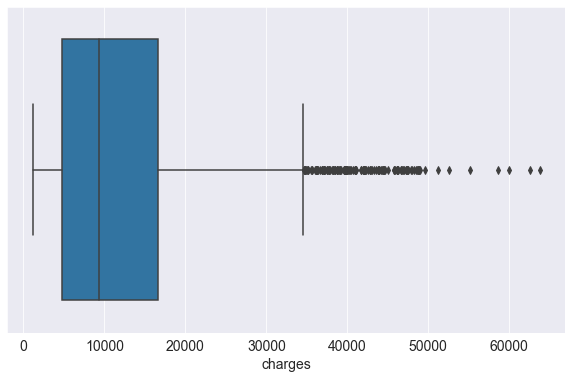

In [141]:
sns.boxplot(df['charges'])
plt.show()

In [142]:
df.drop(df[(df['bmi']>45) & ( df['charges']>40000)].index,inplace=True)


In [143]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Smoking and Charges

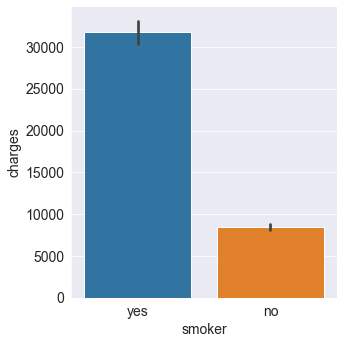

In [144]:
### lets check relationship between smoker and chages column
sns.catplot(x='smoker',y='charges',data=df,kind='bar')
plt.show()

##### Smokers are generally paying more money towards yearly medical expenditure

#### BMI and Charges

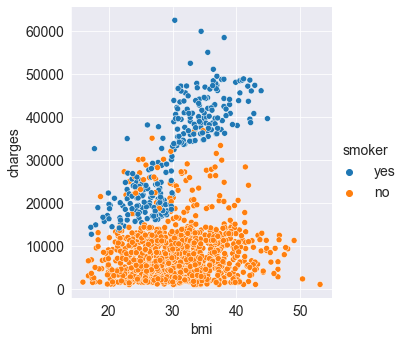

In [145]:
sns.relplot(x='bmi',y='charges',data=df,hue='smoker')
plt.show()

##### Huge cluster of dots between 30 to 40 shows that people who have bmi between 30 and 40 have to pay more towards yearlsy medical expenditure

#### Smoker and BMI

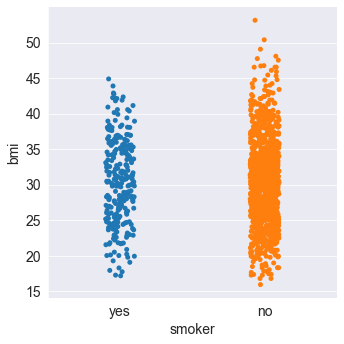

In [146]:
### lets check relationship between smoker and bmi column
sns.catplot(x='smoker',y='bmi',data=df)
plt.show()

In [147]:
df.groupby('smoker')['bmi'].median()

smoker
no     30.3525
yes    30.2500
Name: bmi, dtype: float64

#### Sex & BMI

In [148]:
df.groupby('sex')['bmi'].mean()

sex
female    30.301760
male      30.889369
Name: bmi, dtype: float64

#### Sex and Charges

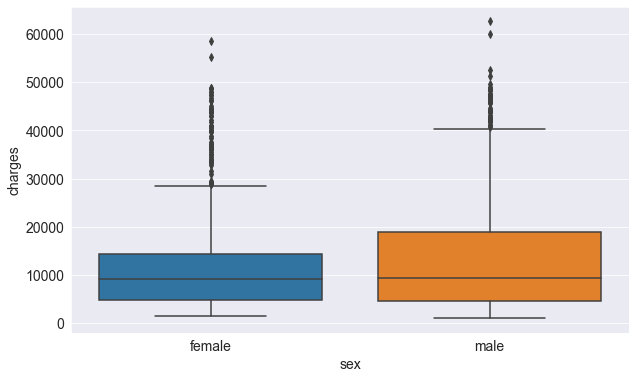

In [149]:
sns.boxplot(data=df,x=df['sex'],y=df['charges'])
plt.show()

##### A person's bmi can be high irrespective of smoking habit and sex.

In [150]:
### Lets check the relationship between sex and charges feature.

In [151]:
df['sex'].value_counts()

male      674
female    659
Name: sex, dtype: int64

In [152]:
df.groupby('sex')['charges'].mean()

sex
female    12390.461382
male      13869.658995
Name: charges, dtype: float64

##### On an avereage males have to pay little bit more for medical expenditure.

#### Age and Charges

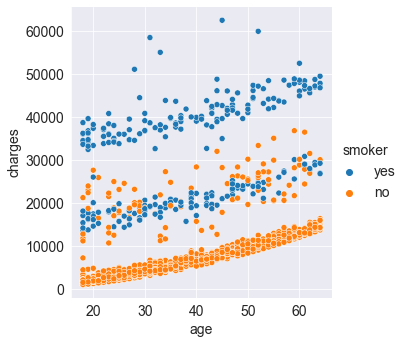

In [153]:
sns.relplot(x='age',y='charges',data=df,hue='smoker')
plt.show()

##### yearly Medical charges increase gradually with age but with variation

#### Region and Charges

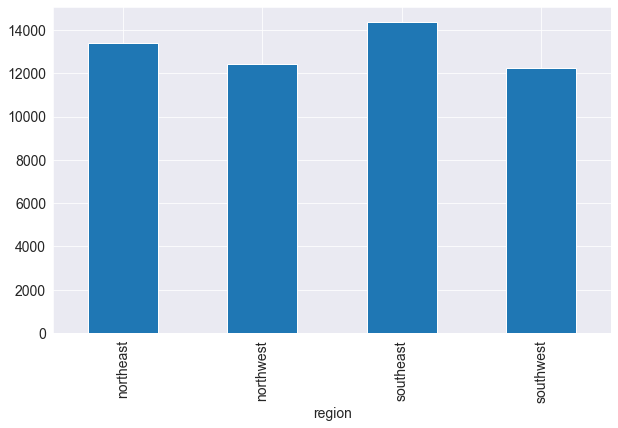

In [154]:
df.groupby('region')['charges'].mean().plot.bar()
plt.show()

In [155]:
df['region'].value_counts()

southeast    360
northwest    325
southwest    324
northeast    324
Name: region, dtype: int64

### Correlation

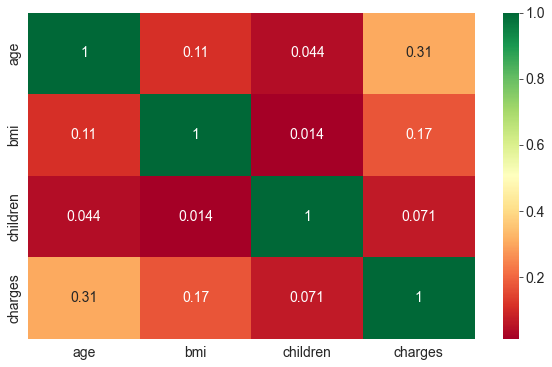

In [156]:
### Only numerical columns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [157]:
dictionary = {'no': 0, 'yes': 1}
smoker_new = df.smoker.map(dictionary)
df.charges.corr(smoker_new)

0.7845539522348776

In [158]:
df['sex']=np.where(df['sex']=='male',0,1)

In [159]:
df['smoker']=np.where(df['smoker']=='yes',1,0)

In [160]:
df['region'].value_counts()

southeast    360
northwest    325
southwest    324
northeast    324
Name: region, dtype: int64

In [161]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


### X and Y Split

In [162]:
X_data=df.drop('charges',axis=1)
X_data

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,southwest
1,18,0,33.770,1,0,southeast
2,28,0,33.000,3,0,southeast
3,33,0,22.705,0,0,northwest
4,32,0,28.880,0,0,northwest
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest
1334,18,1,31.920,0,0,northeast
1335,18,1,36.850,0,0,southeast
1336,21,1,25.800,0,0,southwest


In [163]:
Y_data=df['charges']
Y_data

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1333, dtype: float64

### Train ,Test Split

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.20,random_state=0)

In [166]:
print(X_train.shape)
print(X_test.shape)


(1066, 6)
(267, 6)


In [167]:
X_train


,age,sex,bmi,children,smoker,region
571,18,1,37.290,1,0,southeast
1279,25,1,26.790,2,0,northwest
49,36,0,35.200,1,1,southeast
1170,18,0,27.360,1,1,northeast
1274,26,0,27.060,0,1,southeast
...,...,...,...,...,...,...
766,47,0,32.300,1,0,southwest
838,35,1,23.465,2,0,northeast
1221,40,0,24.970,2,0,southeast
562,27,0,30.500,0,0,southwest


In [168]:
dictionary = {'southeast': 0, 'southwest': 1,'northwest':2,'northeast':3}
X_train['region']=X_train['region'].map(dictionary)



In [169]:
X_test['region']=X_test['region'].map(dictionary)


In [170]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [171]:
X_train

,age,sex,bmi,children,smoker,region
571,18,1,37.290,1,0,0
1279,25,1,26.790,2,0,2
49,36,0,35.200,1,1,0
1170,18,0,27.360,1,1,3
1274,26,0,27.060,0,1,0
...,...,...,...,...,...,...
766,47,0,32.300,1,0,1
838,35,1,23.465,2,0,3
1221,40,0,24.970,2,0,0
562,27,0,30.500,0,0,1


In [173]:
X_test

,age,sex,bmi,children,smoker,region
1162,30,0,38.830,1,0,0
446,60,0,29.640,0,0,3
459,40,1,33.000,3,0,0
251,63,1,32.200,2,1,1
1258,55,0,37.715,3,0,2
...,...,...,...,...,...,...
1105,54,1,31.240,0,0,0
618,19,1,33.110,0,1,0
194,18,0,34.430,0,0,0
240,23,1,36.670,2,1,3


### Model Building

#### Hyperparameter Tuning using Grid Search CV

In [194]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#### Linear Regression

In [175]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [176]:
y_pred=lr.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score: 0.7662204004050128
MAE 4210.110341090645


#### Ridge Regression

In [177]:
ridge=Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [178]:
y_pred=ridge.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score: 0.7598751037835312
MAE 4344.70072191186


#### Lasso Regression

In [179]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [180]:
y_pred=lasso.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score: 0.7662204013021605
MAE 4210.110539370725


#### KNN

In [181]:
knr = KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')

In [182]:
y_pred=knr.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score: 0.38883972831964186
MAE 6579.172724069693


#### SVR

In [183]:
svr = SVR(kernel='rbf',C=10000,epsilon=0.1)
svr.fit(X_train,y_train)


SVR(C=10000)

In [184]:
y_pred=svr.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score: -0.043468413046907184
MAE 6447.42361497787


#### Decision Tree

In [185]:
tree= DecisionTreeRegressor(max_depth=8)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [186]:
y_pred=tree.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score: 0.8333238564206222
MAE 2606.7813501036385


#### Random Forest

In [187]:
rf = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [188]:
y_pred=rf.predict(X_test)
print('R2 score:',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score: 0.8635214680209549
MAE 2540.784495807878


In [196]:
r2=r2_score(y_test,y_pred)
r2

0.8635214680209549

In [197]:
X_test.shape

(267, 6)

In [198]:
### Adjusted R2 score
adj_r2_score=1 - ((1-r2)*(267-1)/(267-6-1))
adj_r2_score

0.8603719634368231

#### Exporting the  model

In [189]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rf,open('model.pkl','wb'))

In [190]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [191]:
X_train

,age,sex,bmi,children,smoker,region
571,18,1,37.290,1,0,0
1279,25,1,26.790,2,0,2
49,36,0,35.200,1,1,0
1170,18,0,27.360,1,1,3
1274,26,0,27.060,0,1,0
...,...,...,...,...,...,...
766,47,0,32.300,1,0,1
838,35,1,23.465,2,0,3
1221,40,0,24.970,2,0,0
562,27,0,30.500,0,0,1
